In [46]:
import pandas as pd
import requests
from datetime import date, timedelta

# Polygon API Key
API_KEY = "GET YOUR OWN KEY"
BASE_URL = "https://api.polygon.io"

# Get the date one week before
current_date = date.today()

# Stock symbol and date range
symbol = "AAPL"  # Apple Inc.
timespan = "day"  # Daily candles
from_date = current_date - timedelta(days=7)
to_date = date.today()

# Polygon.io aggregates endpoint
''' use this to adjust what gets pulled from the URL
https://polygon.io/docs/stocks/get_v2_aggs_ticker__stocksticker__range__multiplier___timespan___from___to
'''
url = f"{BASE_URL}/v2/aggs/ticker/{symbol}/range/5/minute/{from_date}/{to_date}?adjusted=true&sort=asc&apiKey=n_4memqwrYdyzCYsz2X0fnZ2JbIhpJJS"

# Parameters
params = {
    "adjusted": "true",   # Adjusted for splits/dividends
    "sort": "asc",        # Sort data in ascending order
    "limit": 1000000,       # Max number of results (adjust as needed)
    "apiKey": API_KEY
}

# Send request
response = requests.get(url, params=params)
data = response.json()

df = pd.DataFrame(data['results'])
df['t'] = pd.to_datetime(df['t'], unit='ms')
df = df.rename(columns={ 
    'v': 'Volume',
    'vw': 'Vol Weighted Avg Price',
    'o': 'Open',
    'c': 'Close',
    'h': 'High',
    'l': 'Low',
    't': 'DateTime',
    'n': 'Transactions',
})
df.describe(), df.head(7)

(             Volume  Vol Weighted Avg Price        Open       Close  \
 count  9.580000e+02              958.000000  958.000000  958.000000   
 mean   3.169321e+05              235.874488  235.874679  235.891257   
 min    2.780000e+02              218.835400  219.080000  219.040000   
 25%    7.493500e+03              231.389275  231.341250  231.400000   
 50%    5.297800e+04              237.494650  237.500000  237.497500   
 75%    4.673290e+05              239.011900  238.992100  238.992350   
 max    5.073287e+06              248.000200  248.041000  248.030000   
 std    5.350190e+05                6.055264    6.079790    6.055419   
 
              High         Low                       DateTime  Transactions  
 count  958.000000  958.000000                            958    958.000000  
 mean   236.139768  235.611296  2025-01-29 16:55:20.668058368   4044.538622  
 min    219.900000  218.060000            2025-01-27 09:00:00      9.000000  
 25%    231.666225  231.130000        

In [28]:
df['t'] = pd.to_datetime(df['t'], unit='ms')
df = df.rename(columns={ 
    'v': 'Volume',
    'vw': 'Vol Weighted Avg Price',
    'o': 'Open',
    'c': 'Close',
    'h': 'High',
    'l': 'Low',
    't': 'DateTime',
    'n': 'Transactions',
})
df.head()

In [10]:
from datetime import date, timedelta

current_date = date.today()
one_week_before = current_date - timedelta(days=7)

print("Current Date:", current_date)
print("One Week Before:", one_week_before)

Current Date: 2025-02-03
One Week Before: 2025-01-27


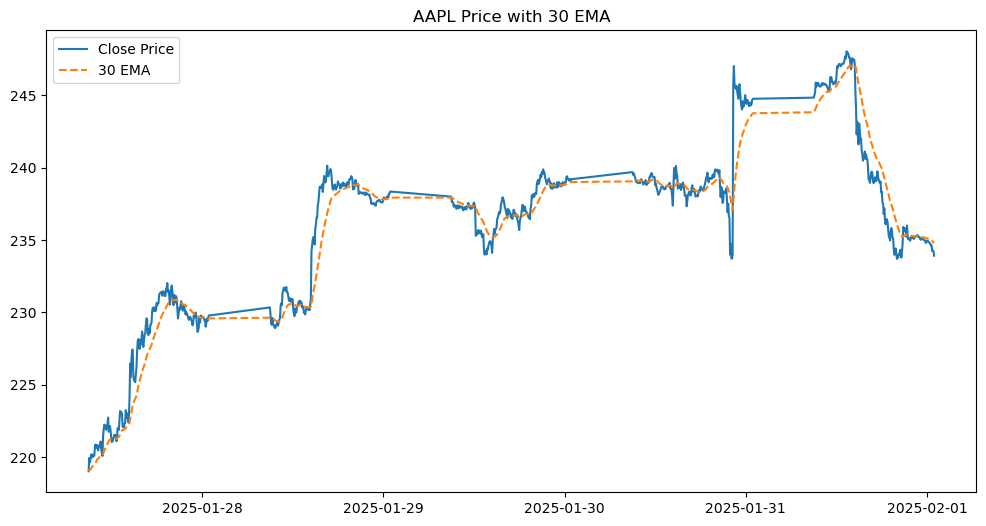

In [47]:
import matplotlib.pyplot as plt

df['EMA_30'] = df['Close'].ewm(span=30, adjust=False).mean()

plt.figure(figsize=(12, 6))
plt.plot(df['DateTime'], df['Close'], label='Close Price')
plt.plot(df['DateTime'], df['EMA_30'], label='30 EMA', linestyle='--')
plt.title(f'{symbol} Price with 30 EMA')
plt.legend()
plt.show()

In [ ]:
from openai import OpenAI

client = OpenAI(api_key="<DeepSeek API Key>", base_url="https://api.deepseek.com")

response = client.chat.completions.create(
    model="deepseek-chat",
    messages=[
        {"role": "system", "content": "You are a helpful assistant"},
        {"role": "user", "content": "Hello"},
    ],
    stream=False
)

print(response.choices[0].message.content)

## create(temperature= ) param

Coding / Math  	0.0 

Data Cleaning / Data Analysis	1.0  -- DEFAULT

General Conversation	1.3

Translation	1.3

Creative Writing / Poetry	1.5


In [ ]:
from openai import OpenAI

client = OpenAI(api_key="<DeepSeek API Key>", base_url="https://api.deepseek.com")

# Initial system message to set the assistant's behavior
messages = [{"role": "system", "content": "You are a helpful assistant"}]

while True:
    user_input = input("You: ")
    if user_input.strip().lower() in ["exit", "quit"]:
        break

    # Add the user's message to the conversation history
    messages.append({"role": "user", "content": user_input})

    # Send the entire conversation history to the API
    response = client.chat.completions.create(
        model="deepseek-chat",
        messages=messages,
        stream=False,
        temperature= 1.0 # Data Cleaning / Data Analysis
    )

    # Get the AI's reply and print it
    ai_reply = response.choices[0].message.content
    print(f"AI: {ai_reply}")

    # Add the AI's reply to the conversation history
    messages.append({"role": "assistant", "content": ai_reply})